In [3]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 


In [5]:
# loading the dataset
df= pd.read_csv("diabetes.csv")
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


Data Pre-processing

In [8]:
# printing the head of the dataset
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# printing the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
# Checking missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No missing values found. 

In [14]:
# checking data type for each attribute 
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [16]:
# Displaying basic statistics for each column
print("Descriptive statistics:")
df.describe()


Descriptive statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Many variables have minimum values of 0.
It appears that null values have been recorded as zeros because biological factors like blood pressure, skin thickness, insulin, BMI, and glucose cannot have zero values.


In [19]:
# Checking for zeros in each column
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

zero_counts = (df[columns_to_check] == 0).sum()

print("Count of zeros (missing values) in each column:")
print(zero_counts)



Count of zeros (missing values) in each column:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


The data contain missing values and zero was used as a placeholder 

In [22]:
# Replacing zeros with NaN for identified columns
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, pd.NA)


In [24]:
# Imputing the missing values with the median of each column
df['Glucose'].fillna(df['Glucose'].median(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)


The missing values were impututed using the median.

In [27]:
# Checking for any remaining NaN values
print("Remaining missing values after imputation:")
print(df.isnull().sum())


Remaining missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Exploratory Data Analysis (EDA)


In [32]:
# Descriptive statistics after imputation
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


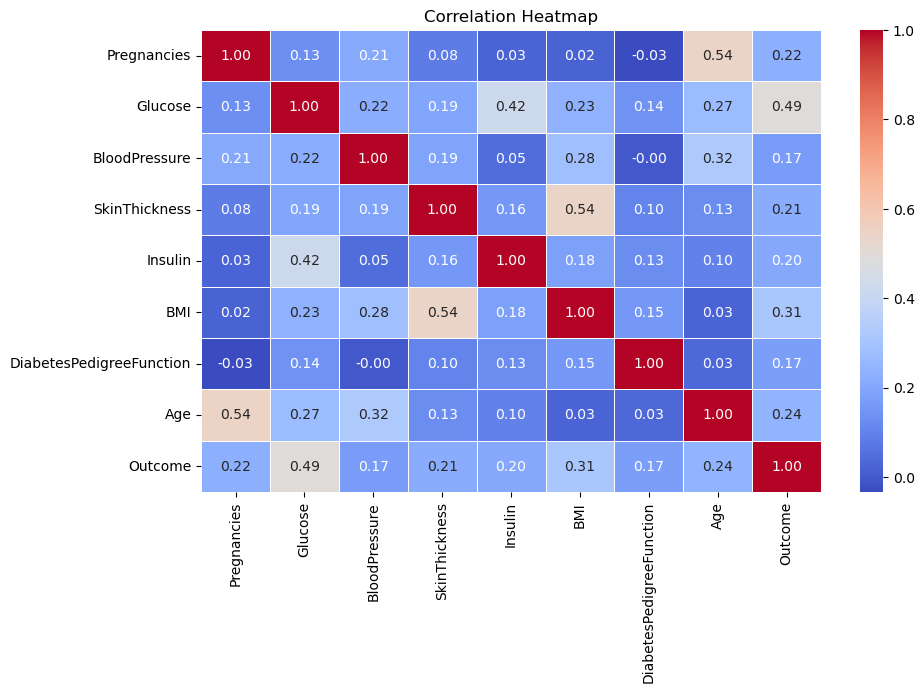

In [34]:
# Calculating the correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


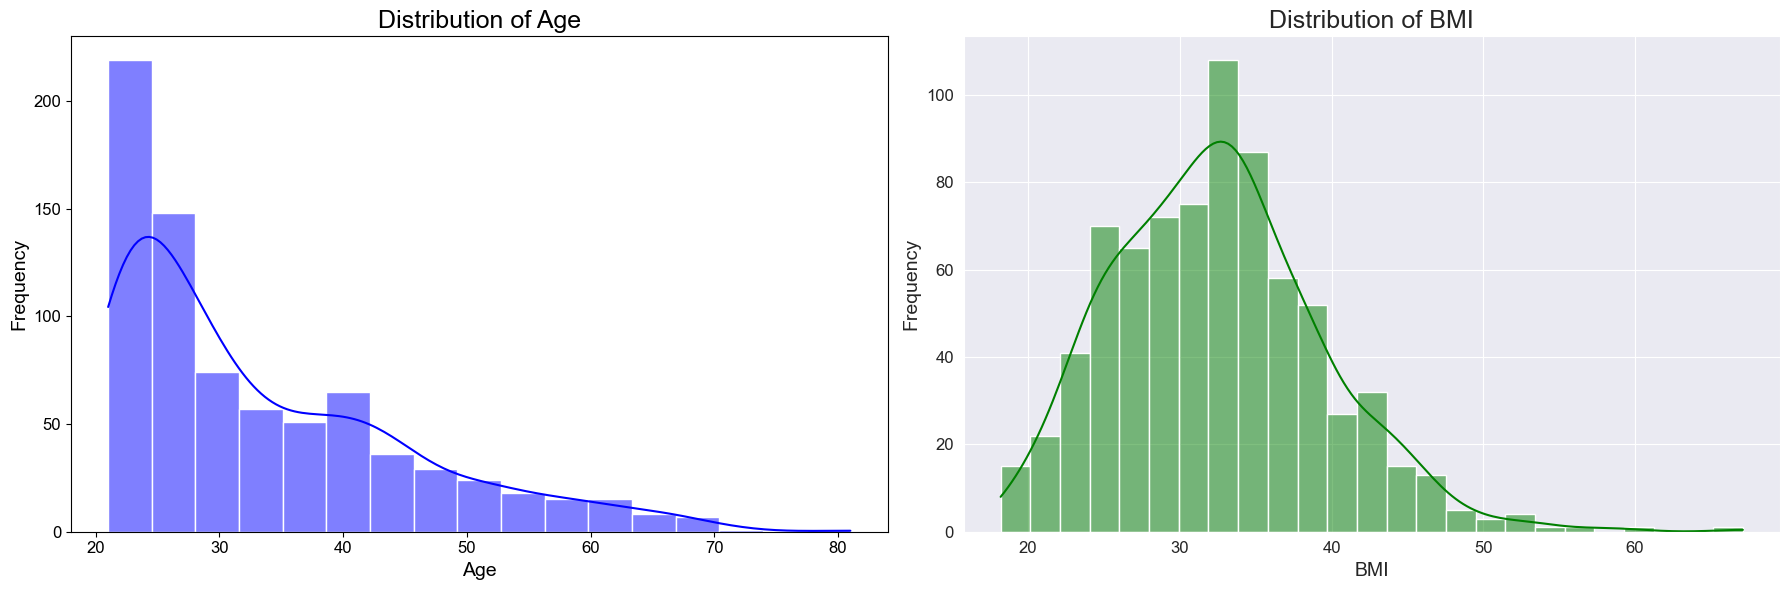

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a figure for two subplots
plt.figure(figsize=(18, 6))

# 1st subplot: Distribution of Age
plt.subplot(1, 2, 1)
sns.set_style("darkgrid")  # dark background with grid
plt.title("Distribution of Age", fontsize=18)
sns.histplot(df.Age, kde=True, color='blue')  # Histogram with KDE
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 2nd subplot: Distribution of BMI
plt.subplot(1, 2, 2)
sns.set_style("darkgrid")  # dark background with grid
plt.title("Distribution of BMI", fontsize=18)
sns.histplot(df.BMI, kde=True, color='green')  # Histogram with KDE
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjusting the layout to ensure plots don't overlap
plt.tight_layout()

# Displaying the plots
plt.show()



There is a higher number of participants who are at the age of 21, and low participants at the age of 81.
A BMI of 34 was more common in the participants. 

Model Implementation 

In [40]:

# Splitting the dataset into features and target
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




A training set (80% of the data) is the data used to train the model and a testing set (20% of the data) which it’s the data used to evaluate the performance of the model

Model Training

In [44]:
# Creating and training the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [46]:
# Making predictions
y_pred = model.predict(X_test)


Model Evaluation

In [49]:
from sklearn.metrics import classification_report
import pandas as pd

# Generating the classification report
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Converting the dictionary to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Displaying the DataFrame
report_df



,precision,recall,f1-score,support
0,0.791667,0.767677,0.779487,99.000000
1,0.603448,0.636364,0.619469,55.000000
accuracy,0.720779,0.720779,0.720779,0.720779
macro avg,0.697557,0.702020,0.699478,154.000000
weighted avg,0.724446,0.720779,0.722338,154.000000


Precision: How many of the predicted data points were actually true.
Recall: How many of the really true data points were predicted as true.
F1- score=: a trade-off between precision and recall once a model reacges its limit of capability.


Accuracy: 0.7208
Confusion Matrix:
[[76 23]
 [20 35]]


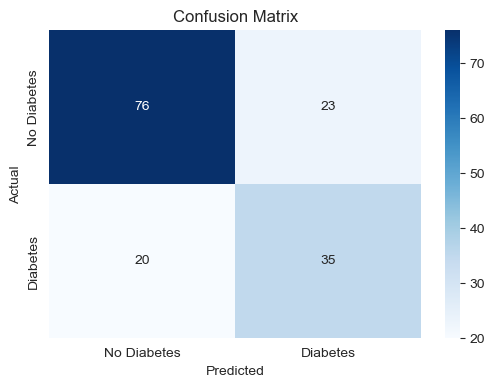

In [53]:
#Evaluatinging  the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing accuracy and confusion matrix
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

#Visualizing the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



The model predicted 76 cases of true negative (TN),  35 true positive (TP) cases, 20 false negative (FN) cases and 23 false positive(FP) cases.

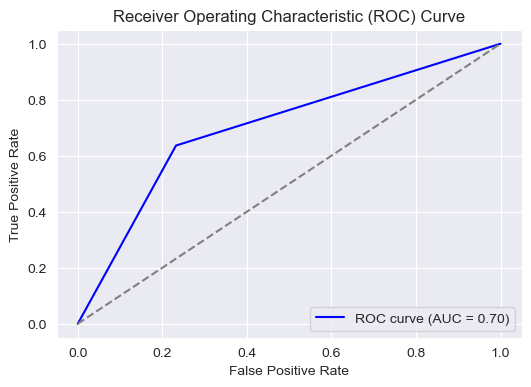

In [56]:
# Getting  predicted probabilities for the positive class (class 1)
y_prob = model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_curve, auc
# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculating the AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The area under the Receiver Operating Characteristic (ROC) Curve is 0.70 

Decision Tree Plot

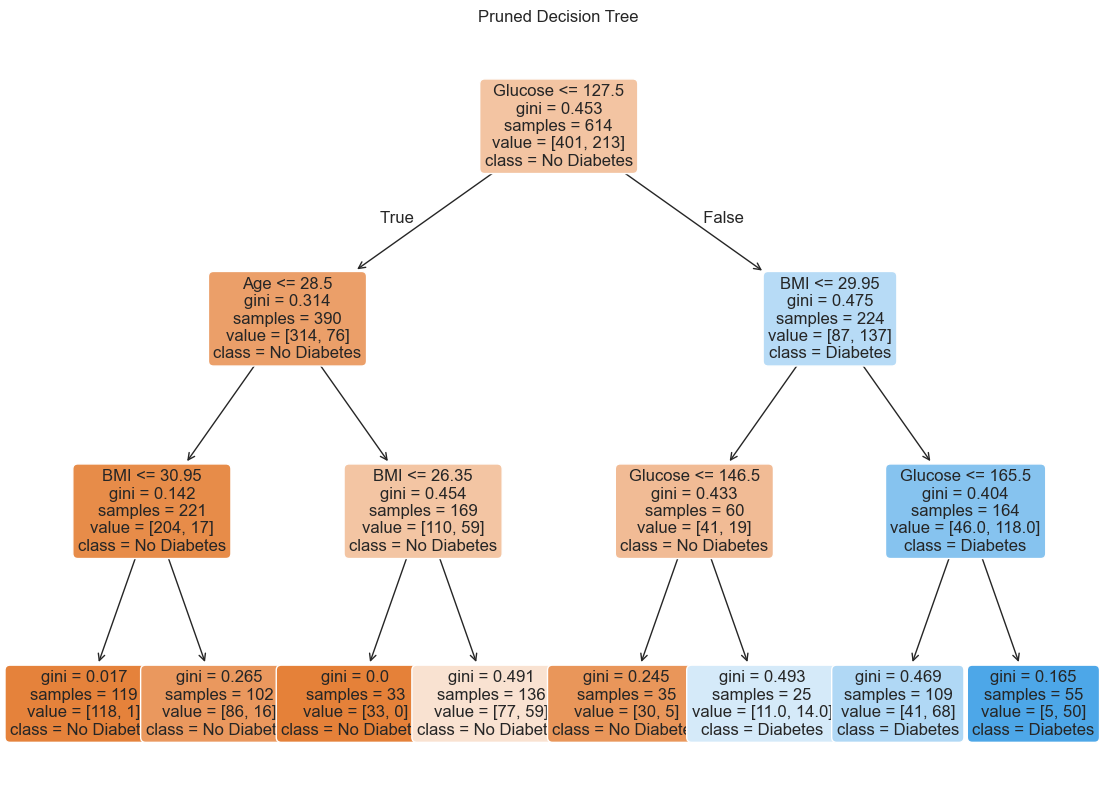

In [60]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Limitting the depth of the tree to avoid clustering
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

# Plotting the tree
plt.figure(figsize=(14, 10))
plot_tree(tree_model, filled=True, feature_names=df.drop('Outcome', axis=1).columns, class_names=['No Diabetes', 'Diabetes'], rounded=True, fontsize=12)
plt.title("Pruned Decision Tree")
plt.show()


The root node of the tree is glucose concentration.